In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
from scipy import stats
#import statsmodels.api as sm

fileT = 'Gaussian_Decomp_Results/Temp-Dependence-Study.csv'

In [103]:
h = const.h
c = const.c
e = const.e

In [104]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

## Power Dependence Analysis

In [105]:
fileP = 'Gaussian_Decomp_Results/Power-Dependence-Study.csv'
df = pd.read_csv(fileP)
df.head()

,Filter,Amplitude_0,A0_err,Amplitude_1,A1_err
0,0.3,23708.500000,391.882195,7019.85000,116.511527
1,0.6,6625.747487,178.635356,1928.34924,47.878054


m0 = 1.8455639906288506 +/- -0.12591636256680294
m1 = 1.870473804068121 +/- -0.11994042809438477


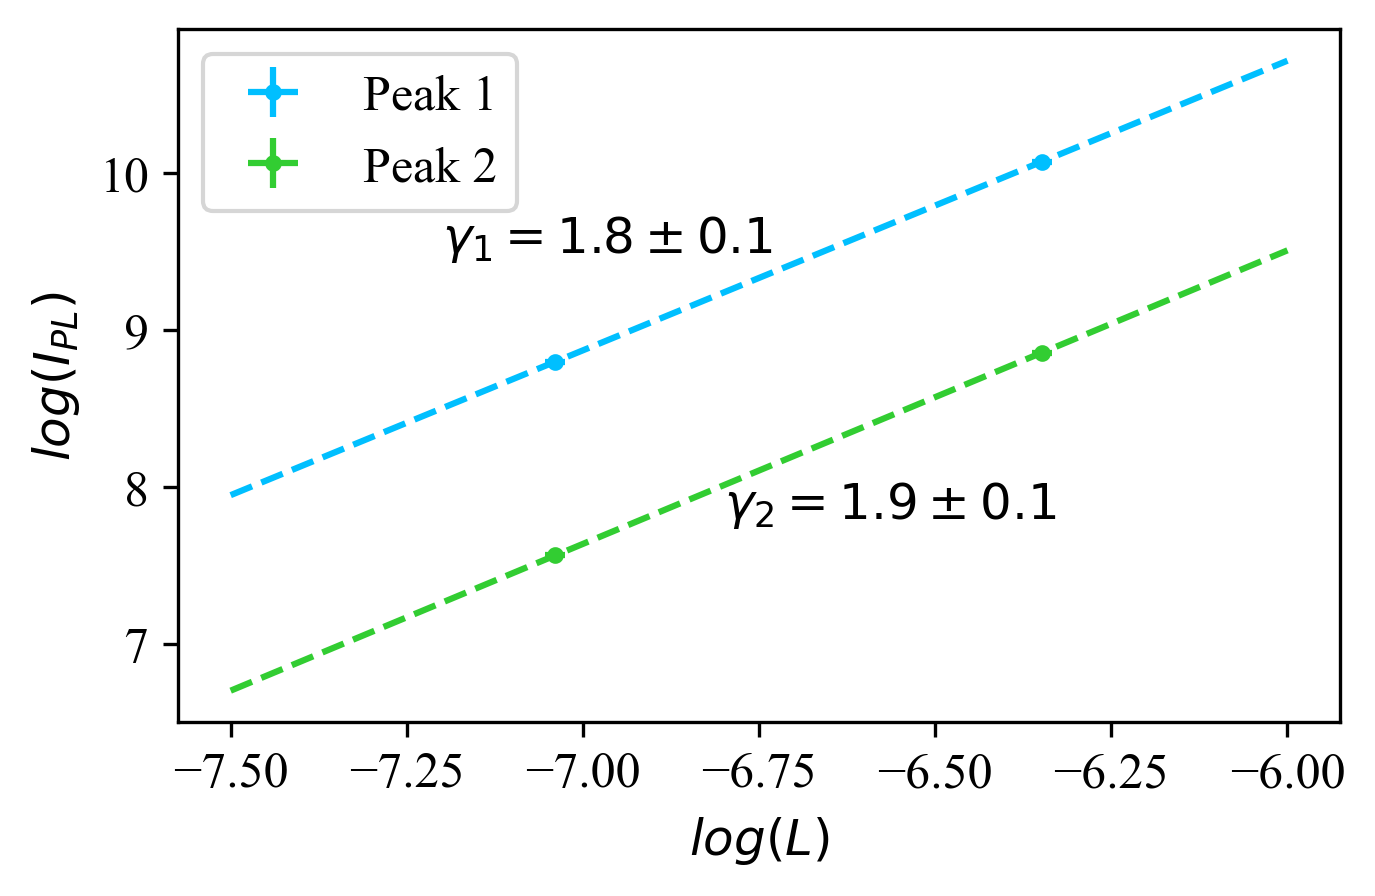

In [113]:
# Determine laser intensity through each filter
# using P = I_0 * 10**-(ND) and plot against
# amplitude on logarithmic scale

I_0 = 3.49E-3 # 5mW laser
dI_0 = 0.05E-3  # Uncertainty on laser power
powers = I_0 * 10**-(df['Filter'])  # Laser power [mW]
dpowers = dI_0 * 10 ** -(df['Filter'])  # propagates uncertainty on laser power

x = np.log(powers).to_numpy()
dx = (dpowers / powers).to_numpy()

y0 = np.log(df['Amplitude_0']).to_numpy()
dy0 = (df['A0_err'] / df['Amplitude_0']).to_numpy()

y1 = np.log(df['Amplitude_1']).to_numpy()
dy1 = (df['A1_err'] / df['Amplitude_1']).to_numpy()

# Fit linear regression via least squares
m0, b0, r, p, dm0 = stats.linregress(x, y0)
m1, b1, r, p, dm1 = stats.linregress(x, y1)
xseq = np.linspace(-7.5, -6, num=100)

fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot()
ax.errorbar(x, y0, xerr=dx, yerr=dy0, fmt='.', label="Peak 1", color="deepskyblue")
ax.errorbar(x, y1, xerr=dx, yerr=dy1, fmt='.', label="Peak 2", color="limegreen")
ax.plot(xseq, b0 + m0 * xseq, '--', color="deepskyblue")
ax.plot(xseq, b1 + m1 * xseq, '--', color="limegreen")

ax.set_xlabel('$log(L)$')
ax.set_ylabel('$log(I_{PL})$')
ax.legend()

m0_max = ((y0[-1] + dy0[-1]) - (y0[0] - dy0[0])) / (x[-1] - x[0])
m0_min = ((y0[-1] - dy0[-1]) - (y0[0] + dy0[0])) / (x[-1] - x[0])

m1_max = ((y1[-1] + dy1[-1]) - (y1[0] - dy1[0])) / (x[-1] - x[0])
m1_min = ((y1[-1] - dy1[-1]) - (y1[0] + dy1[0])) / (x[-1] - x[0])

print(f"m0 = {m0} +/- {m0_max - m0_min}")
print(f"m1 = {m1} +/- {m1_max - m1_min}")

ax.text(-7.2, 9.5, f'$\gamma_1 = {m0:.1f} \pm {np.abs(m0_max - m0_min) :.1f}$')
ax.text(-6.8, 7.8, f'$\gamma_2 = {m1:.1f} \pm {np.abs(m1_max - m1_min) :.1f}$')

plt.show()

## Temperature Dependence Analysis

In [115]:
df = pd.read_csv(fileT)
df['Mean_0'] = df['Mean_0'] * 1E-9  # convert to m
df['Mean_1'] = df['Mean_1'] * 1E-9 
df['Mean_0 err'] = df['Mean_0 err'] * 1E-9 
df['Mean_1 err'] = df['Mean_1 err'] * 1E-9 
df['FWHM_0'] = df['FWHM_0'] * 1E-9
df['FWHM_1'] = df['FWHM_1'] * 1E-9
df['FWHM_0 err'] = df['FWHM_0 err'] * 1E-9
df['FWHM_1 err'] = df['FWHM_1 err'] * 1E-9
dT = 0.00005  # Uncertainty on T measurement
m_T = 0.05081  # Rate of increase in temperature (K/s)

int_times = np.array([0.05, 0.35, 0.7, 0.9, 1.2, 0.9])
dT = int_times * m_T

df.head()

,Temp [K],Filter,FWHM_0,FWHM_0 err,FWHM_1,FWHM_1 err,Mean_0,Mean_0 err,Mean_1,Mean_1 err,Amp_0,A0_err,Amp_1,A1_err,Alpha,SNR
0,90,0.3,6.399823e-09,9.307782e-11,2.629369e-08,2.251154e-10,5.337804e-07,4.161781e-11,5.450068e-07,1.545929e-10,23707.71719,391.970929,7021.581220,116.543473,0.06,3.0
1,100,0.3,6.020000e-09,7.000000e-11,1.898000e-08,2.100000e-10,5.317900e-07,3.000000e-11,5.382500e-07,1.200000e-10,43943.70708,490.354702,13497.663490,229.971221,2.00,2.3
2,120,0.3,7.158989e-09,7.967863e-11,2.276893e-08,2.390820e-10,5.304552e-07,3.245620e-11,5.355617e-07,1.193964e-10,37951.99616,430.957691,9766.591749,208.509243,1.40,4.0
3,140,0.3,9.260000e-09,1.070973e-10,3.008520e-08,3.552061e-10,5.296100e-07,4.305769e-11,5.339900e-07,1.634698e-10,34994.69955,428.359614,6294.900836,191.789168,3.00,2.0
4,160,0.3,1.020577e-08,2.731250e-10,3.540000e-08,1.070296e-09,5.283857e-07,8.957576e-11,5.305087e-07,3.289123e-10,11386.52472,301.150451,2946.105500,231.794884,2.10,1.5


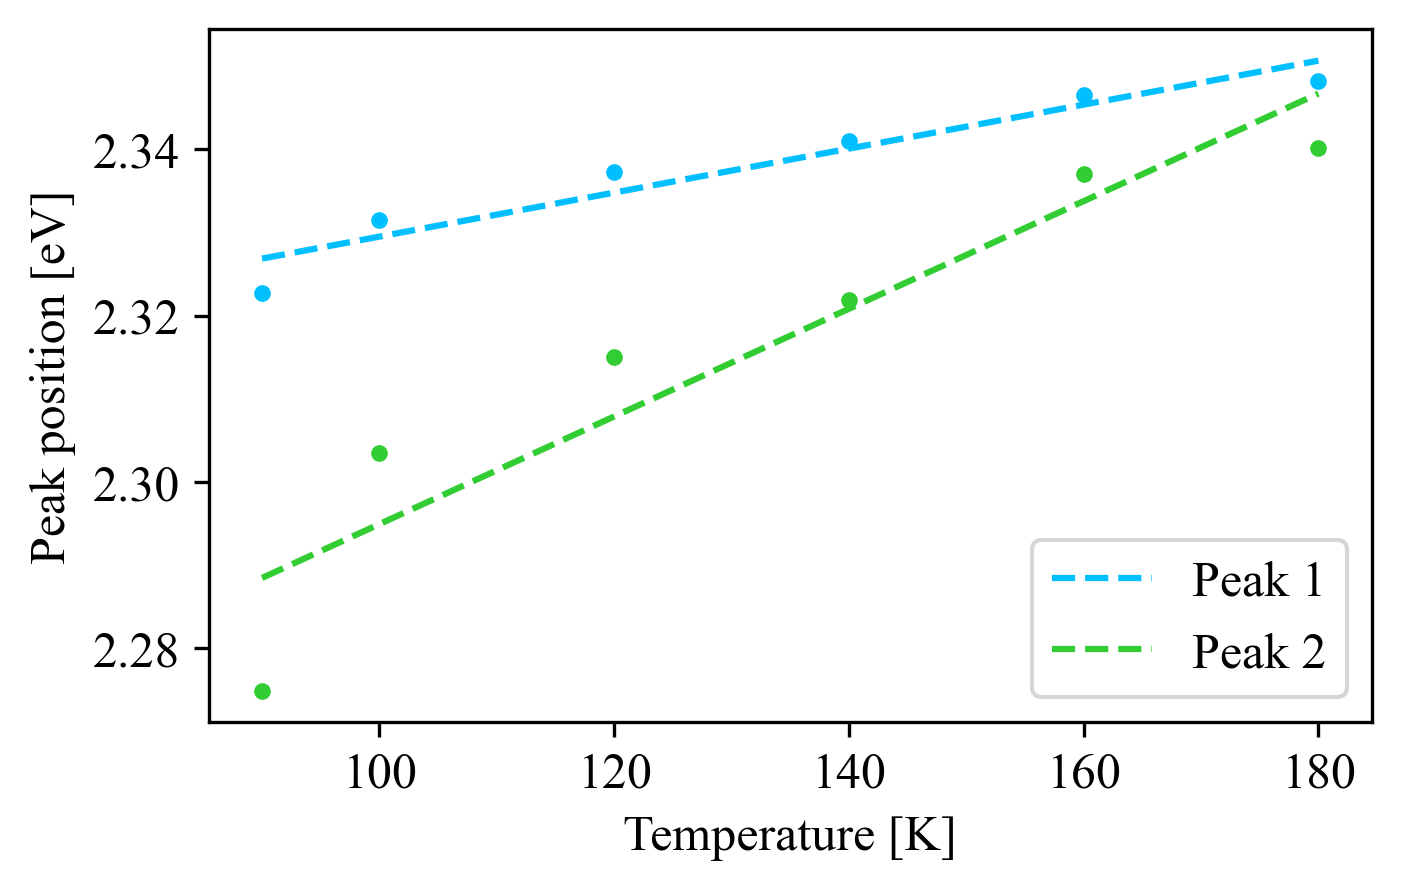

In [116]:
# Plot mean peak position as function of temp
# for the two gaussians. Expect linear relationship
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot()

df['E_0'] = h * c / df['Mean_0'] / e  # Energy in eV E = hc/lda
df['E_1'] = h * c / df['Mean_1'] / e

df['dE_0'] = df['E_0'] ** -2 * h * c * df['Mean_0 err'] / e
df['dE_1'] = df['E_1'] ** -2 * h * c * df['Mean_1 err'] / e

m0, b0 = np.polyfit(df['Temp [K]'], df['E_0'], deg=1)
m1, b1 = np.polyfit(df['Temp [K]'], df['E_1'], deg=1)
xseq = np.linspace(90, 180, num=100)

ax.errorbar(df['Temp [K]'], df['E_0'], yerr=df['dE_0'], xerr=dT, fmt='.', label="Peak 1", color="deepskyblue")
ax.errorbar(df['Temp [K]'], df['E_1'], yerr=df['dE_1'], xerr=dT, fmt='.', label="Peak 2", color="limegreen")
ax.plot(xseq, b0 + m0 * xseq, '--', color="deepskyblue", label=f'$\gamma_1$')
ax.plot(xseq, b1 + m1 * xseq, '--', color="limegreen", label=f'$\gamma_2$')

ax.set_xlabel('Temperature [K]')
ax.set_ylabel('Peak position [eV]')
# ax.set_title("Peak Position vs T for $CsPbBr_3$ Sample YW1149")
ax.legend(["Peak 1", "Peak 2"])
# ax.legend()

We aim to fit the data above using $\omega(T) = \frac{A}{exp(E_p/K_BT)-1}+C$ to determine $E_p$, the energy of the phonon.

In [61]:
# Get the linewidth in terms of energy
df['lw_0'] = (h * c / (df['Mean_0'] - df['FWHM_0'] / 2) - h * c / (df['Mean_0'] + df['FWHM_0'] / 2)) # Energy in J E = hc / lda
df['lw_1'] = (h * c / (df['Mean_1'] - df['FWHM_1'] / 2) - h * c / (df['Mean_1'] + df['FWHM_1'] / 2))

df['d_lw0'] = (h * c * df['FWHM_0 err'] / 2)*(1 / (df['Mean_0'] - df['FWHM_0'] / 2) ** 4 + 1 / (df['Mean_0'] + df['FWHM_0'] / 2) ** 4)  # Propagate FWHM error to energy bandwidth
df['d_lw1'] = (h * c * df['FWHM_1 err'] / 2)*(1 / (df['Mean_1'] - df['FWHM_1'] / 2) ** 4 + 1 / (df['Mean_1'] + df['FWHM_1'] / 2) ** 4)

E_ph1 = 0.03625408966376276 +/- 0.013460209299074724 eV


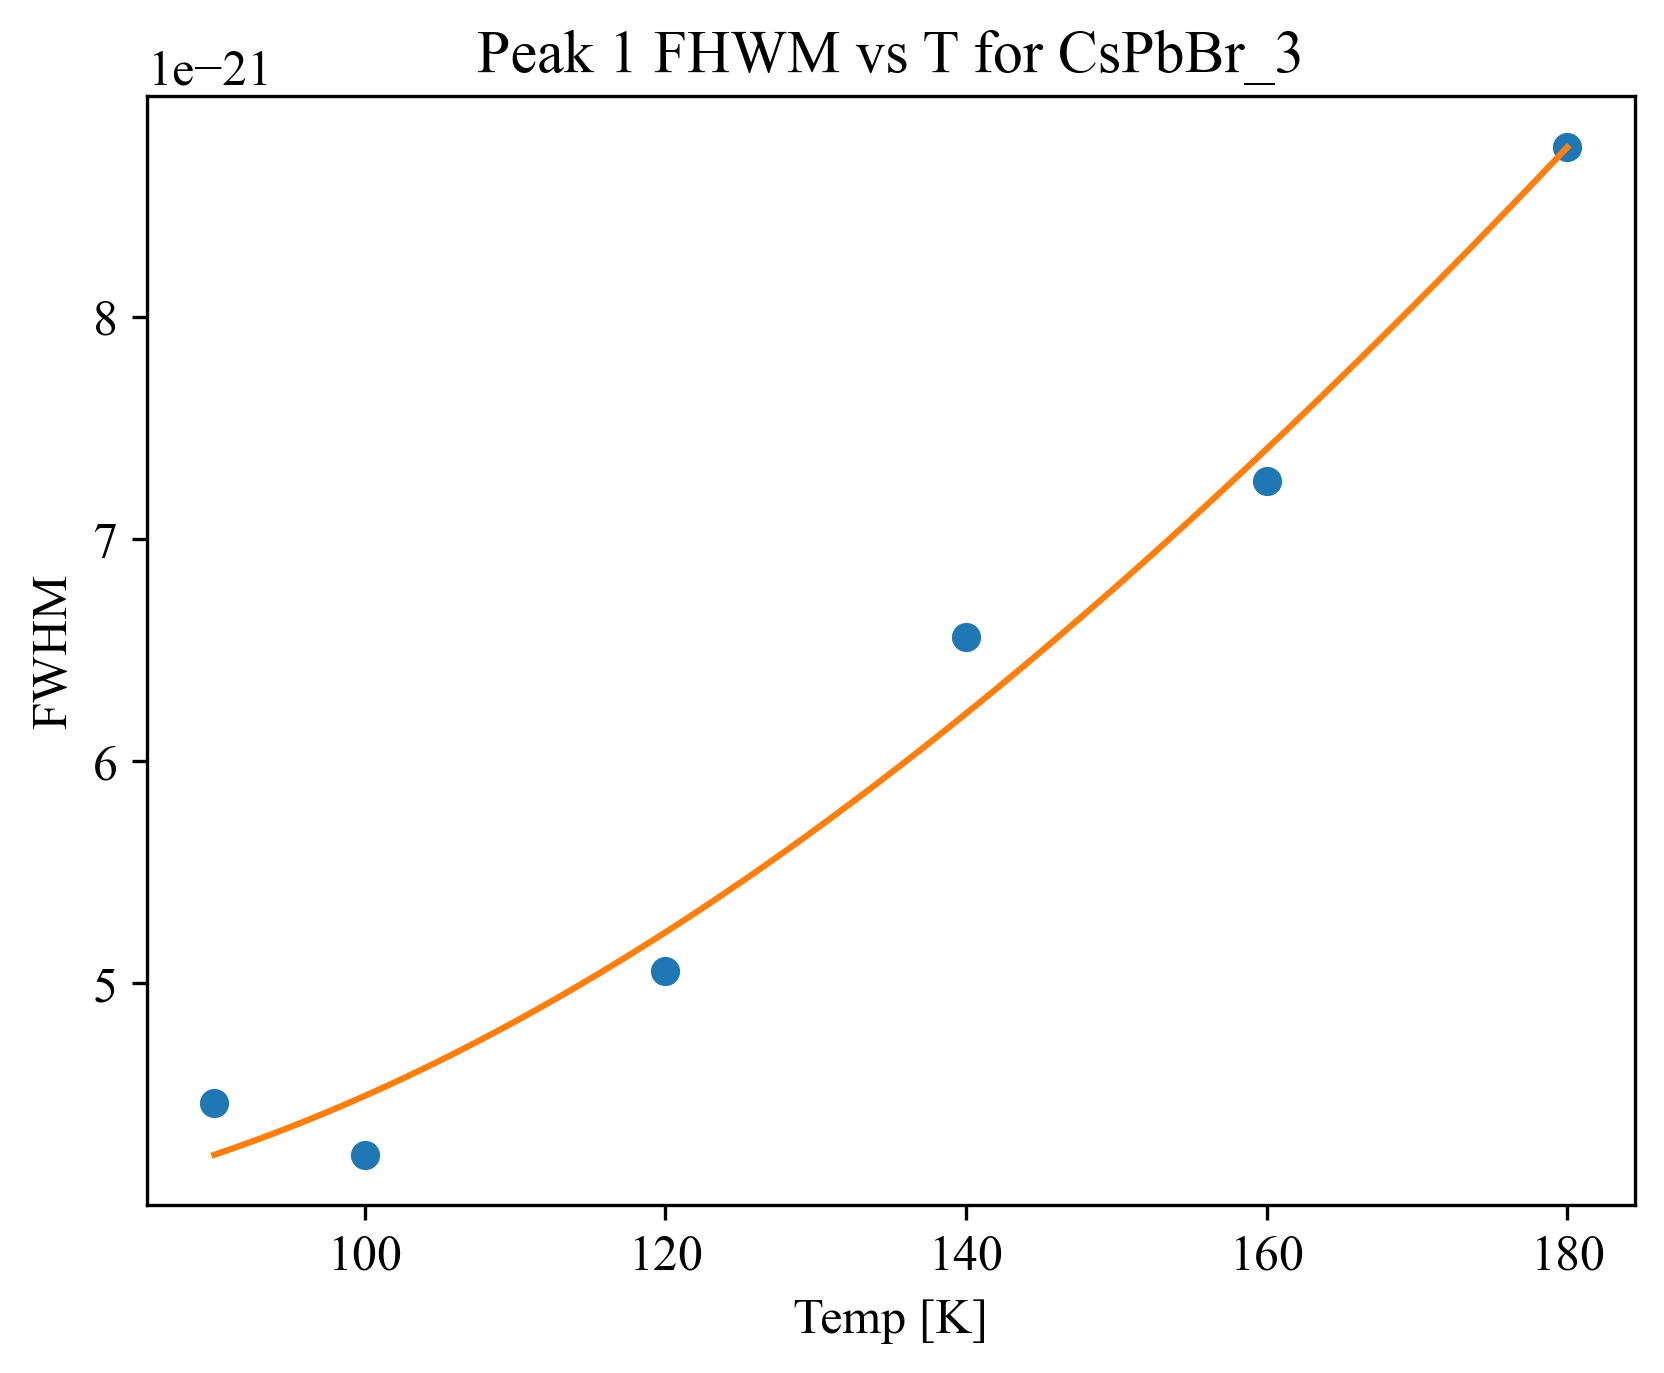

In [87]:
from scipy.optimize import curve_fit

K_B = 8.617*10**(-5) # in eV/K
def Toyozawa(T,A,E_p,C):
    exp = np.exp(E_p/(K_B*T))
    omega = (A/(exp-1))+C
    return omega

# Fit for first peak
guess = [20, 0.015,0.02]
parameters, covariance = curve_fit(Toyozawa, df['Temp [K]'], df['lw_0'], p0=guess)
fit_A0 = parameters[0]
fit_Ep0 = parameters[1]
fit_C0 = parameters[2]

# fitPeak0 = Toyozawa(df['Temp [K]'], fit_A0, fit_Ep0, fit_C0)
temps = np.linspace(df['Temp [K]'].iloc[0], df['Temp [K]'].iloc[-1], 1000)
fitPeak0 = Toyozawa(temps, fit_A0, fit_Ep0, fit_C0)

plt.plot(df['Temp [K]'], df['lw_0'], 'o', label='data')
plt.plot(temps, fitPeak0, '-', label='fit')
plt.title("Peak 1 FHWM vs T for CsPbBr_3")
plt.xlabel("Temp [K]")
plt.ylabel("FWHM")

print(f"E_ph1 = {fit_Ep0} +/- {np.sqrt(covariance[1][1])} eV")

E_ph2 = 0.035642543969982635 +/- 0.04833078989418692 eV


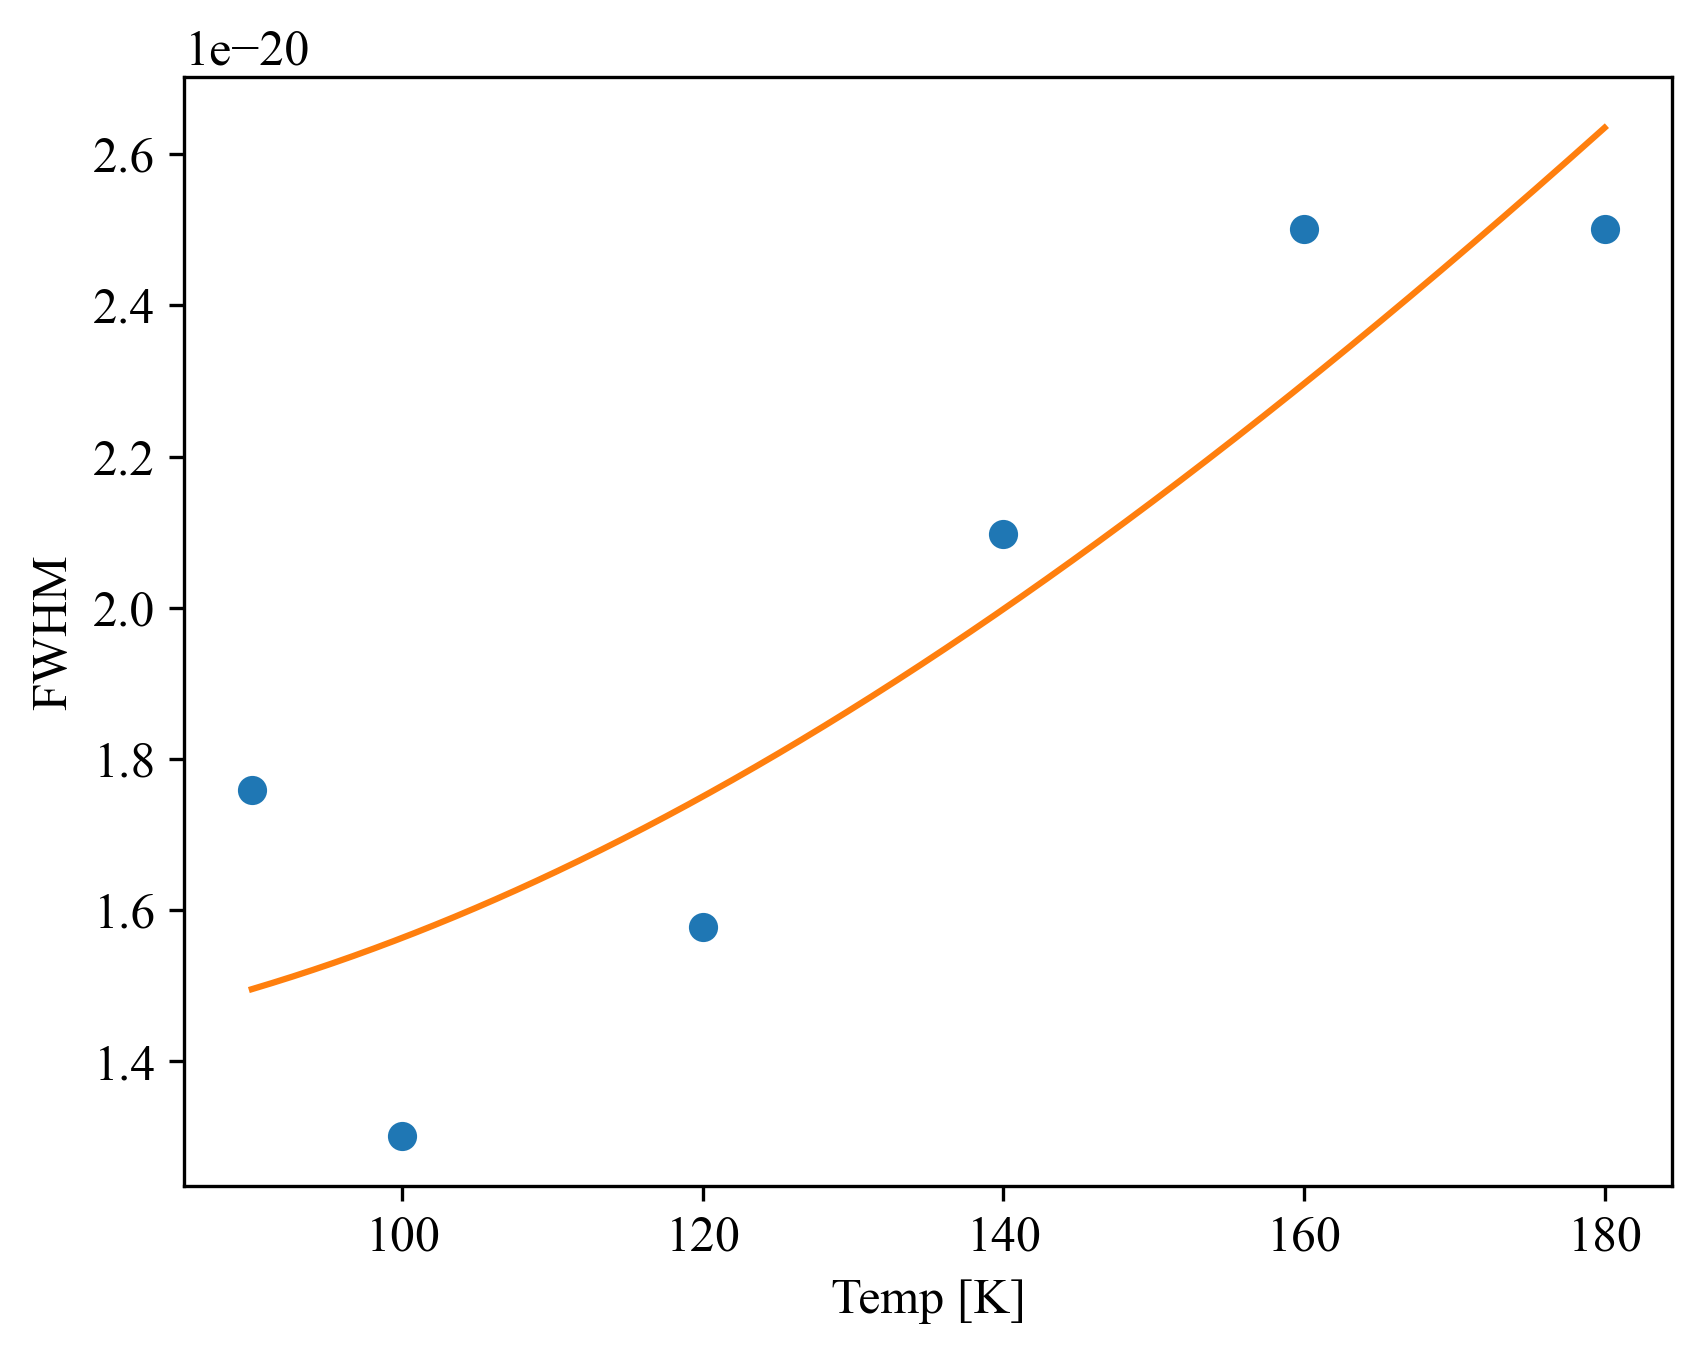

In [89]:
# Fit second peak
guess = [20, 0.015,0.02]
parameters, covariance = curve_fit(Toyozawa, df['Temp [K]'], df['lw_1'], p0=guess)
fit_A1 = parameters[0]
fit_Ep1 = parameters[1]
fit_C1 = parameters[2]

# fitPeak1 = Toyozawa(df['Temp [K]'], fit_A1, fit_Ep1,fit_C1)
temps = np.linspace(df['Temp [K]'].iloc[0], df['Temp [K]'].iloc[-1], 1000)
fitPeak1 = Toyozawa(temps, fit_A1, fit_Ep1, fit_C1)

plt.plot(df['Temp [K]'], df['lw_1'], 'o', label='data')
plt.plot(temps, fitPeak1, '-', label='fit')
# plt.title("Peak 2 FHWM vs T for CsPbBr_3")
plt.xlabel("Temp [K]")
plt.ylabel("FWHM")

print(f"E_ph2 = {fit_Ep1} +/- {np.sqrt(covariance[1][1])} eV")

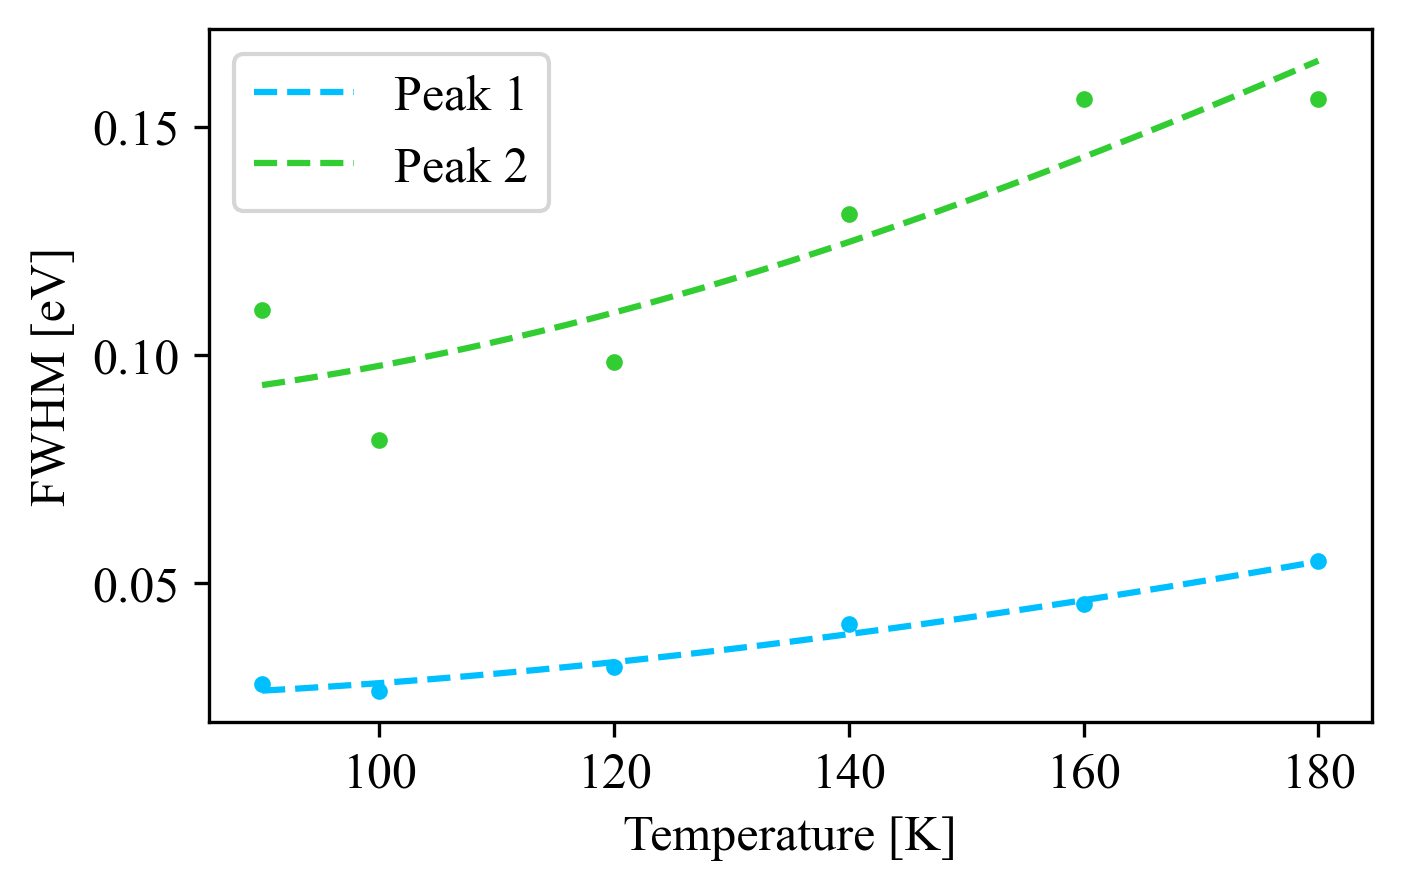

In [117]:
# Plot FWHM as function of temp
# Plot mean peak position as function of temp
# for the two gaussians. Expect linear relationship
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot()

# Get the linewidth in terms of energy
df['lw_0'] = (h * c / (df['Mean_0'] - df['FWHM_0'] / 2) - h * c / (df['Mean_0'] + df['FWHM_0'] / 2)) # Energy in J E = hc / lda
df['lw_1'] = (h * c / (df['Mean_1'] - df['FWHM_1'] / 2) - h * c / (df['Mean_1'] + df['FWHM_1'] / 2))

df['d_lw0'] = (h * c * df['FWHM_0 err'] / 2)*(1 / (df['Mean_0'] - df['FWHM_0'] / 2) ** 4 + 1 / (df['Mean_0'] + df['FWHM_0'] / 2) ** 4)  # Propagate FWHM error to energy bandwidth
df['d_lw1'] = (h * c * df['FWHM_1 err'] / 2)*(1 / (df['Mean_1'] - df['FWHM_1'] / 2) ** 4 + 1 / (df['Mean_1'] + df['FWHM_1'] / 2) ** 4)

ax.errorbar(df['Temp [K]'], df['lw_0'] / e, xerr=dT, yerr=df['d_lw0'], fmt='.', label="Peak 1", color='deepskyblue')
ax.errorbar(df['Temp [K]'], df['lw_1'] / e, xerr=dT, yerr=df['d_lw1'], fmt='.', label="Peak 2", color='limegreen')

ax.plot(temps, fitPeak0/e, '--', label='Peak 1 Fit', color='deepskyblue')
ax.plot(temps, fitPeak1/e, '--', label='Peak 2 Fit', color='limegreen')

ax.set_xlabel('Temperature [K]')
ax.set_ylabel('FWHM [eV]')
#ax.set_title("FWHM vs T for CsPbBr_3 Sample YW1127")
ax.legend(['Peak 1', 'Peak 2'])

Here, we aim to fit intensity vs temperature data with the simplified Thermal-Quenching Equation, $ I(T) = \frac{I_0}{1+C_1*exp(-E1/K_BT)} $ to determine E1, the exciton energy

E_11 = 0.21491920614604412 +/- 0.20341697592448613 eV


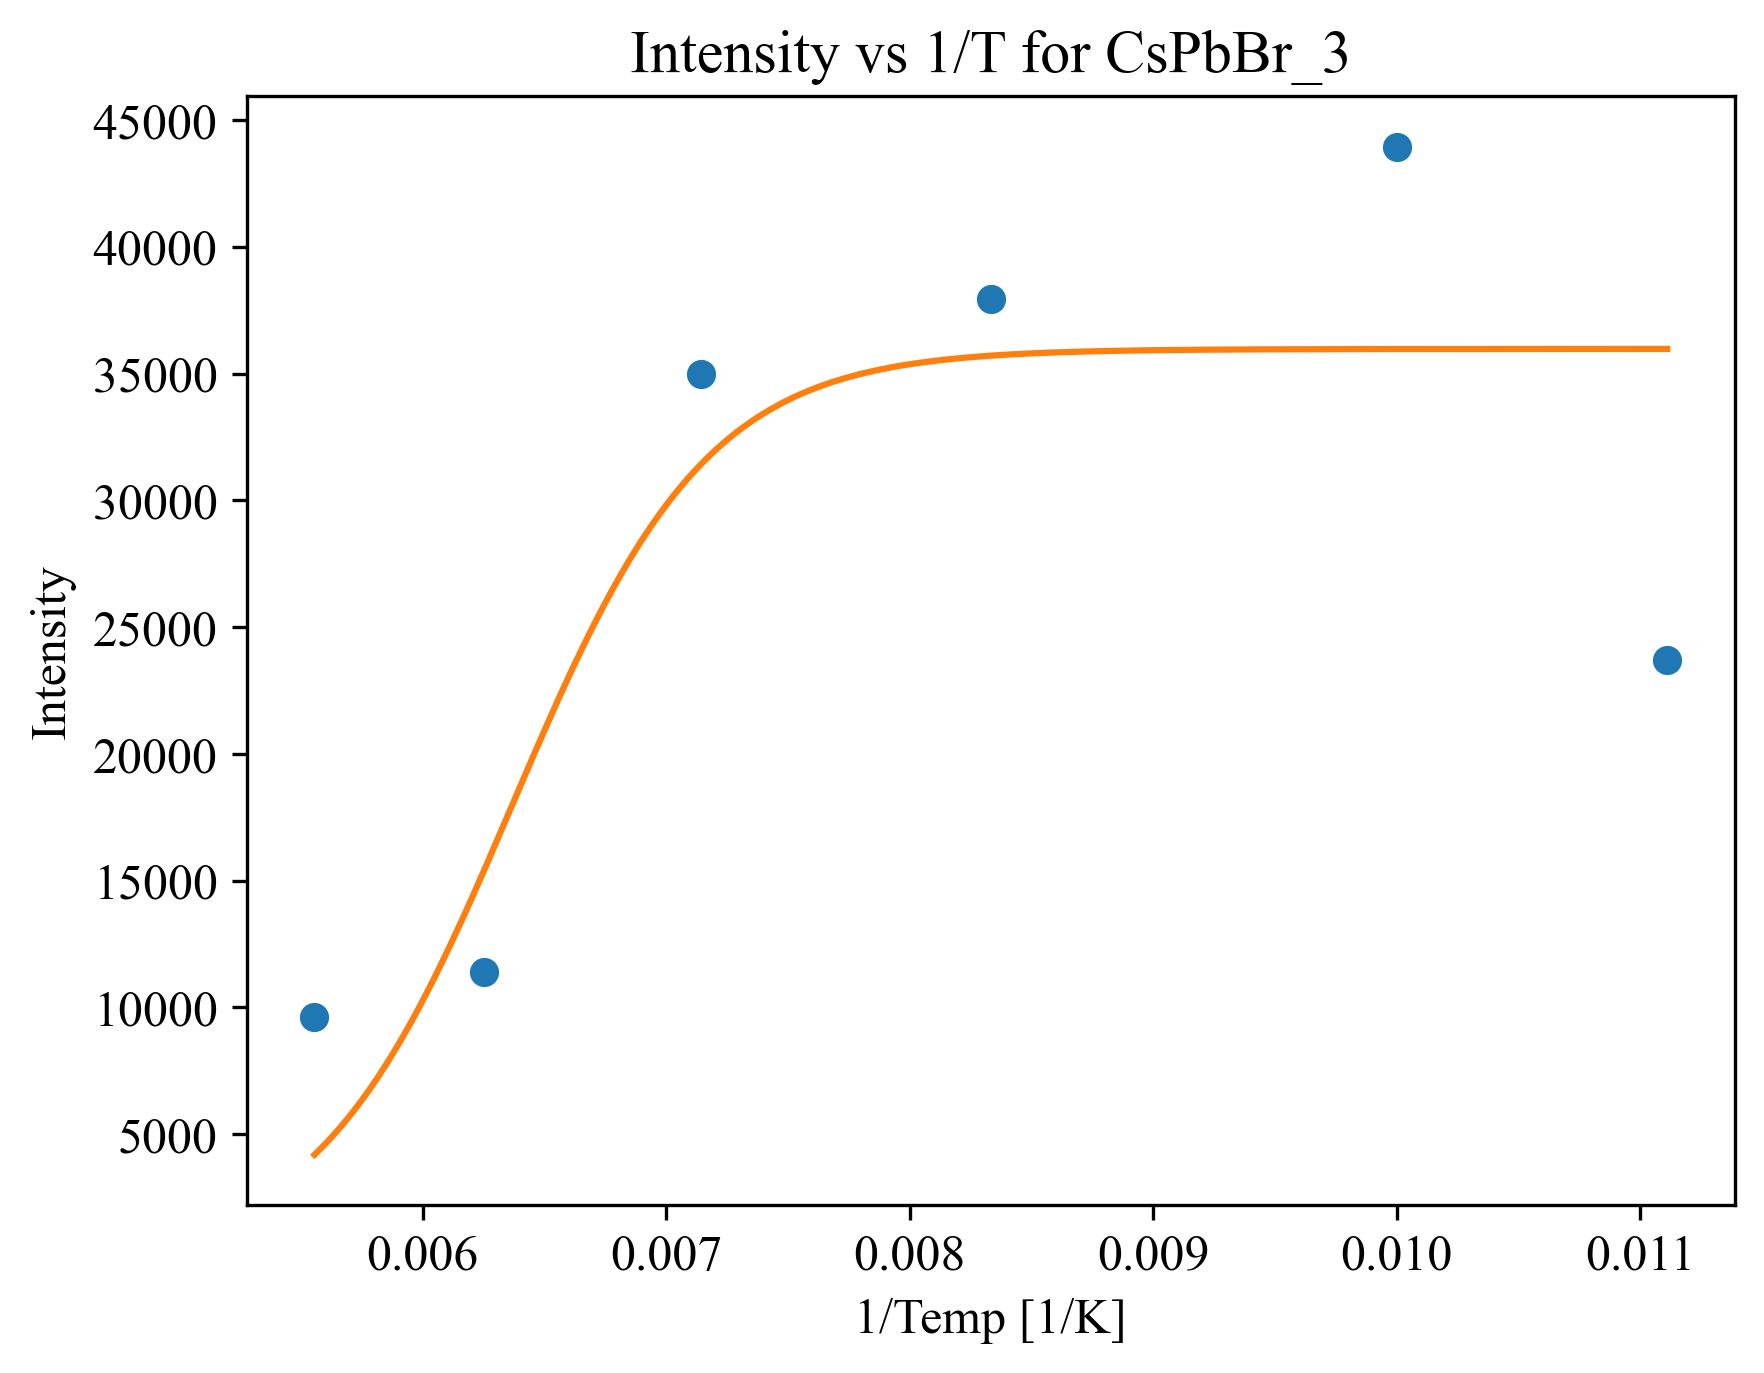

In [96]:
def thermal_quenching(T,E1,C1,I_0):
    return I_0/(1+C1*np.exp(-E1/(K_B*T)))

guess = [0.00002, 10000,300]
parameters, covar = curve_fit(thermal_quenching, df['Temp [K]'], df['Amp_0'], p0=guess)
fit_E1 = parameters[0]
fit_C = parameters[1]
fit_I0 = parameters[2]

# fitTQ0 = thermal_quenching(df['Temp [K]'], fit_E1, fit_C,fit_I0)
fitTQ0 = thermal_quenching(temps, fit_E1, fit_C, fit_I0)

plt.plot(1/df['Temp [K]'], df['Amp_0'], 'o', label='data')
plt.plot(1/temps, fitTQ0, '-', label='fit')
plt.title("Intensity vs 1/T for CsPbBr_3")
plt.xlabel("1/Temp [1/K]")
plt.ylabel("Intensity")

print(f"E_11 = {fit_E1} +/- {np.sqrt(covar[0][0])} eV")

E_12 = 0.13480724028060853 +/- 0.11127408631402264 eV


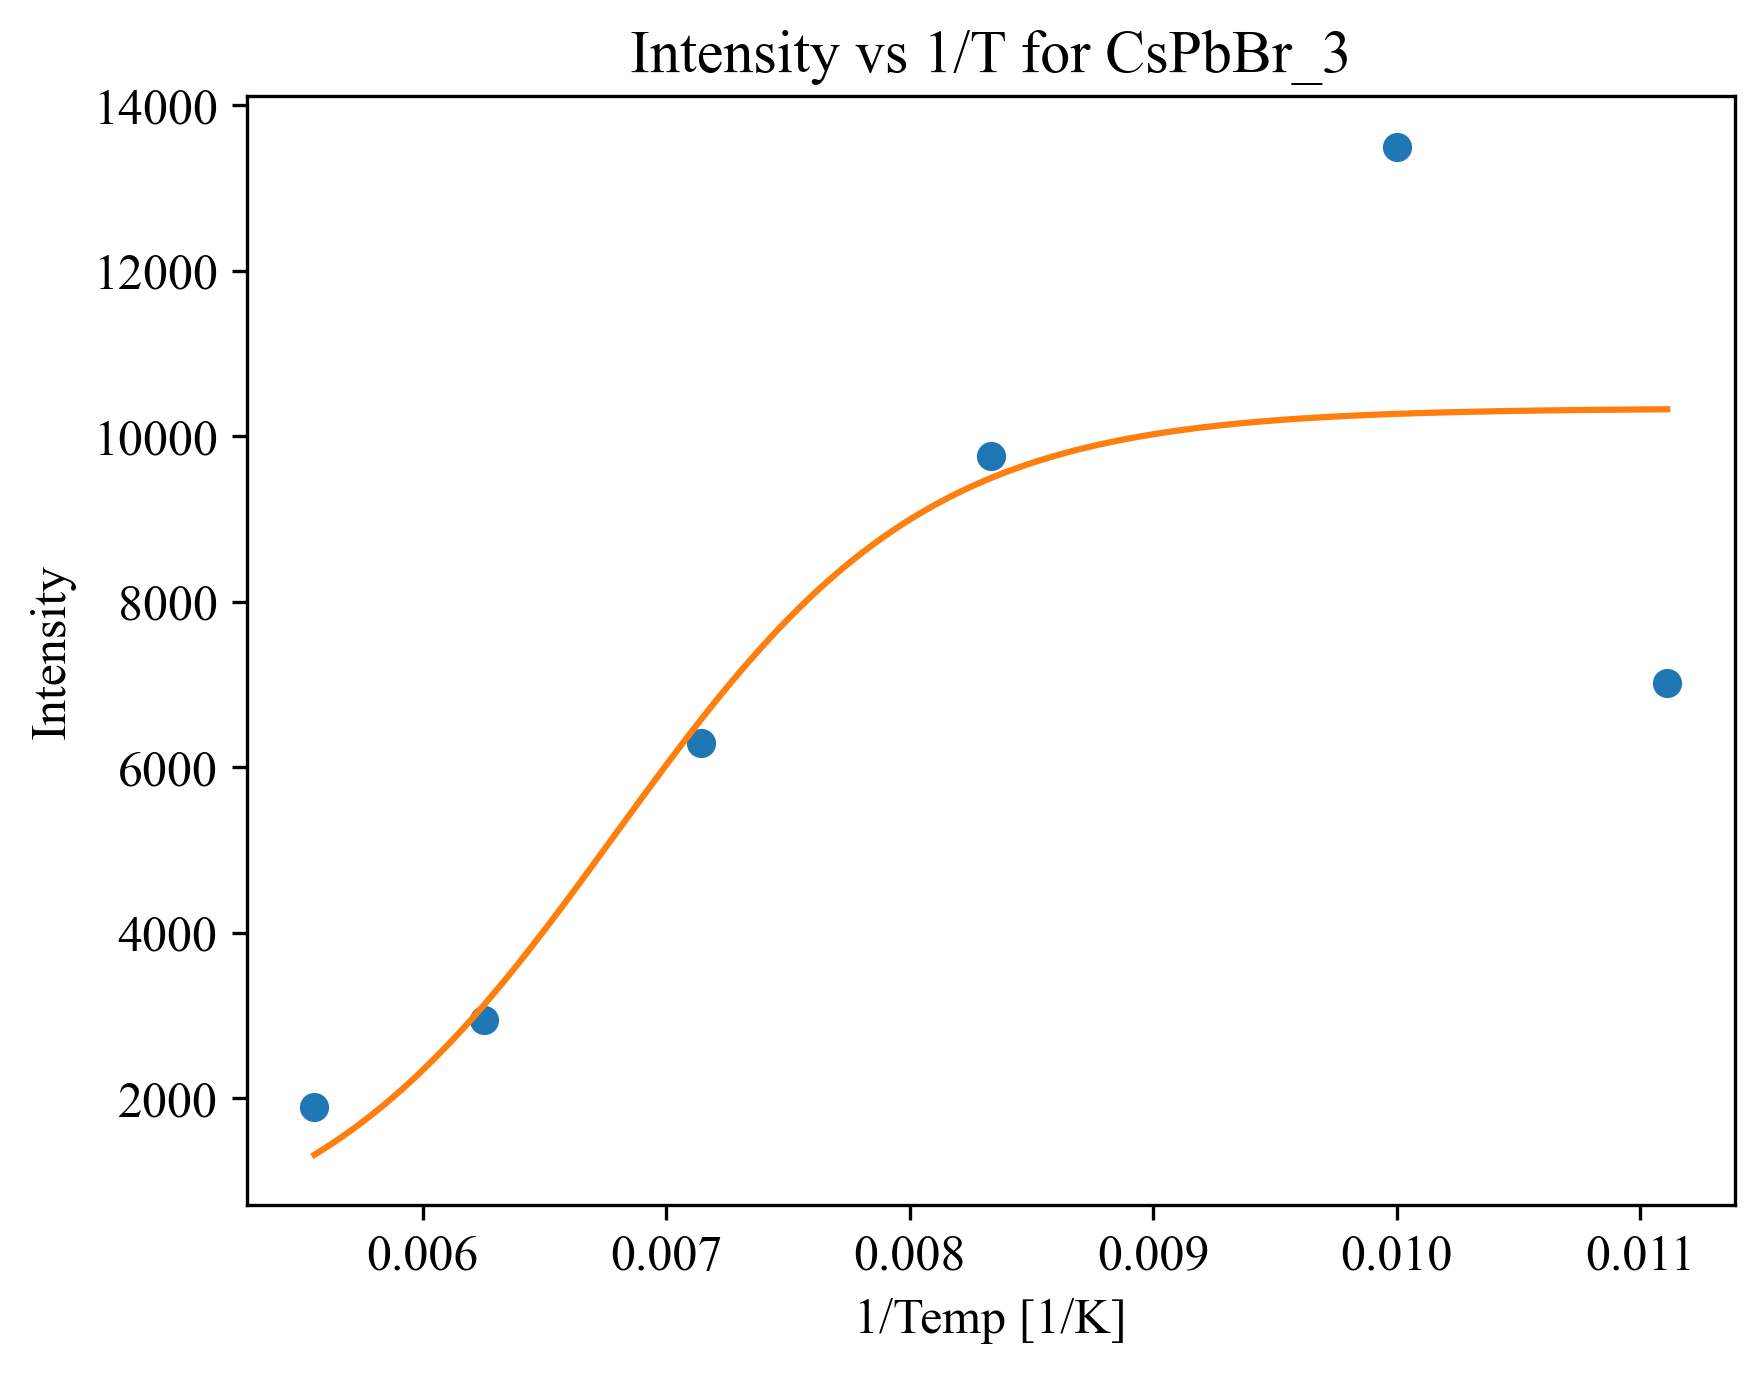

In [98]:
# Fit for second peak
guess = [0.0002, 10000,300]
parameters, covar = curve_fit(thermal_quenching, df['Temp [K]'], df['Amp_1'], p0=guess)
fit_E1 = parameters[0]
fit_C = parameters[1]
fit_I0 = parameters[2]

# fitTQ1 = thermal_quenching(df['Temp [K]'], fit_E1, fit_C,fit_I0)
fitTQ1 = thermal_quenching(temps, fit_E1, fit_C, fit_I0)

plt.plot(1/df['Temp [K]'], df['Amp_1'], 'o', label='data')
plt.plot(1/temps, fitTQ1, '-', label='fit')
plt.title("Intensity vs 1/T for CsPbBr_3")
plt.xlabel("1/Temp [1/K]")
plt.ylabel("Intensity")

print(f"E_12 = {fit_E1} +/- {np.sqrt(covar[0][0])} eV")

Text(0, 0.5, 'PL Intensity')

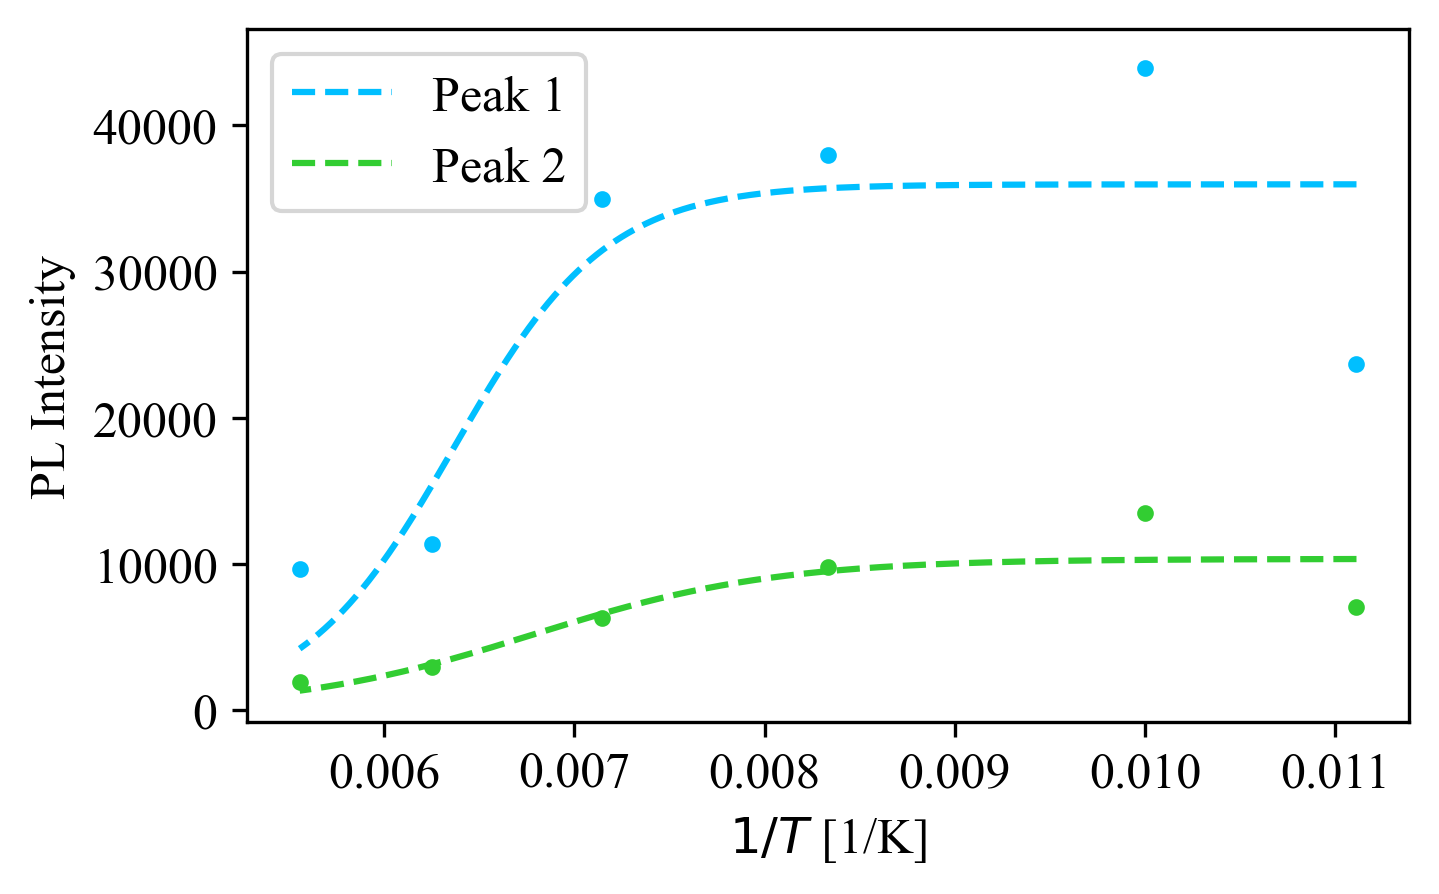

In [118]:
# Plot intensity vs 1/T for the two peaks
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot()

#dTinv = dT/T**2
dTinv = 0

ax.errorbar(1/df['Temp [K]'], df['Amp_0'], xerr=dTinv, yerr=df['A0_err'], fmt='.', label="Peak 1", color='deepskyblue')
ax.errorbar(1/df['Temp [K]'], df['Amp_1'], xerr=dTinv, yerr=df['A1_err'], fmt='.', label="Peak 2", color='limegreen')

ax.plot(1/temps, fitTQ0, '--', label='Peak 1 Fit',color='deepskyblue')
ax.plot(1/temps, fitTQ1, '--', label='Peak 2 Fit',color='limegreen')

ax.legend(['Peak 1', 'Peak 2'])
ax.set_xlabel('$1/T$ [1/K]')
ax.set_ylabel('PL Intensity')